In [1]:
import pandas as pd
import numpy as np

In [2]:
hp = pd.read_csv('Housing Price.csv')
hp.info()
hp.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              536 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


(545, 13)

In [3]:
hp.isnull().sum()

price               0
area                9
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
#Handling null values

from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(hp[['area']])

hp['area'] = impute.transform(hp[['area']])
hp.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
#Removing duplicates

hp = hp.drop_duplicates()
hp.shape

(545, 13)

In [6]:
#Handling categorical variables

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

hp['mainroad'] = enc.fit_transform(hp['mainroad'])
hp['guestroom'] = enc.fit_transform(hp['guestroom'])
hp['basement'] = enc.fit_transform(hp['basement'])
hp['hotwaterheating'] = enc.fit_transform(hp['hotwaterheating'])
hp['airconditioning'] = enc.fit_transform(hp['airconditioning'])
hp['prefarea'] = enc.fit_transform(hp['prefarea'])
hp['furnishingstatus'] = hp['furnishingstatus'].map({'furnished':2,'unfurnished':0,'semi-furnished':1}) 

hp.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.000000,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960.000000,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960.000000,3,2,2,1,0,1,0,0,2,1,1
3,12215000,5087.304104,4,2,2,1,0,1,0,1,3,1,2
4,11410000,5087.304104,4,1,2,1,1,1,0,1,2,0,2


In [7]:
#Feature scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
hp[hp.columns] = scaler.fit_transform(hp[hp.columns])
hp.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.413620,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.0
1,0.909091,0.524014,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.0
2,0.909091,0.595699,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.906061,0.246402,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,1.0
4,0.836364,0.246402,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.0


<AxesSubplot:>

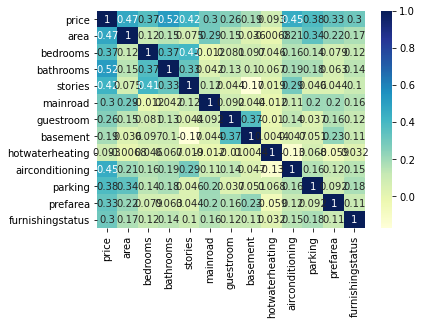

In [8]:
#Handling correlation

import seaborn as sns

hp_corr = hp.corr()
sns.heatmap(hp_corr, annot = True, cmap = 'YlGnBu')

In [9]:
to_drop = ['hotwaterheating']
hp = hp.drop(to_drop, axis=1)
hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    float64
 3   bathrooms         545 non-null    float64
 4   stories           545 non-null    float64
 5   mainroad          545 non-null    float64
 6   guestroom         545 non-null    float64
 7   basement          545 non-null    float64
 8   airconditioning   545 non-null    float64
 9   parking           545 non-null    float64
 10  prefarea          545 non-null    float64
 11  furnishingstatus  545 non-null    float64
dtypes: float64(12)
memory usage: 55.4 KB


In [10]:
# Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x = hp.iloc[:, 1:].values
y = hp.iloc[:, 0].values
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0)

clf = LinearRegression()
clf.fit(xTrain, yTrain)
yPrediction = clf.predict(xTest)

mse = mean_squared_error(yTest, yPrediction)
rmse = np.sqrt(mse)
print(f"Mean Square Error (MSE): {mse}")
print(f"Root Mean Square Error (RMSE): {rmse}")

Mean Square Error (MSE): 0.008016455465233252
Root Mean Square Error (RMSE): 0.0895346606920094


In [11]:
# Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

hp['price_range'] = pd.cut(hp['price'], bins=[0, 0.33, 0.66, 1], include_lowest=True, labels=['Low', 'Mid', 'High'])

X = hp.iloc[:, 1:-1]
y = hp.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train) 
predictions = model.predict(x_test)

acs = accuracy_score(y_test, predictions) 
print(f'Prediction Accuracy: {acs}')

Prediction Accuracy: 0.823170731707317
